In [1]:
import sys
sys.path.append("../../src")
import auxiliary, coordinates, constants, models
from maneuvers import Maneuvers
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
import ipyvolume as ipv
import matplotlib.dates as mdates
%load_ext autoreload
%autoreload 2

In [29]:
def getSatHistoricalData(TleHistoricalFile):
    satCoes = []
    satDates = []
    satRs = []
    with open(TleHistoricalFile,"r") as f:
        while True:
            line1 = f.readline()
            line2 = f.readline()
            if line1 == "":
                break
            i = float(line2[8:16])*np.pi/180
            Omega = float(line2[17:25])*np.pi/180
            e = float("0."+line2[26:33])
            omega = float(line2[34:42])*np.pi/180
            M = float(line2[43:51])*np.pi/180

            for E in range(0,3600):
                E = E/10*np.pi/180
                if(abs(E-e*np.sin(E)-M) < 0.01):
                    break;
  
            nu = 2*np.arctan2((1+e)**0.5*np.sin(E/2),(1-e)**0.5*np.cos(E/2))

            n = float(line2[52:63])*2*np.pi/(60*60*24)
            a = (constants.mu_E/n**2)**(1/3)

            if int(line1[18:20]) < 60:
                year = int("20"+line1[18:20])
            else:
                year = int("19"+line1[18:20]) 

            coe = [a,e,i,omega,Omega,nu]
            
            date = datetime.datetime(year,1,1)+datetime.timedelta(days=float(line1[20:32]))
          
            # BSTAR has units of (earth radii)**-1
            # Air density reference: 0.1570 kg/m^2/Earth radii
            BSTAR = float(line1[53]+"0."+line1[54:59])*10**float(line1[59:61])
            B = BSTAR*2/0.1570
            satCoes.append(coe)
            satDates.append(date)
            r,v = coordinates.kep2cart(coe)
            satRs.append(r)
    satCoes = np.array(satCoes).reshape((-1,6))
    satRs = np.array(satRs).reshape((-1,3))
    return satDates, satCoes, satRs

In [63]:
SUCHAIDates, SUCHAICoes, SUCHAIRs = getSatHistoricalData("Historic_TLEs/SUCHAI.txt");
maneuvers = Maneuvers(SUCHAICoes[0,:],models.Spacecraft(1,1-0.1,0.1),SUCHAIDates[0])
for idx,row in enumerate(SUCHAICoes):
    maneuvers.history.mee[-1,:] = coordinates.kep2eq(row)
    T = 2*np.pi*(row[0]**3/constants.mu_E)**0.5
    maneuvers.propagate(T,60)

Propagating...from day  0.0  to  0.06576335810286972
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.06576335810286972  to  0.1315265138480685
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.1315265138480685  to  0.19728950702471335
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.19728950702471335  to  0.2630523943311278
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.2630523943311278  to  0.3288151986455536
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.3288151986455536  to  0.39457797311924253
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.39457797311924253  to  0.4603406781808875
The solver success


Propagating...from day  4.011443481719152  to  4.077202856515527
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  4.077202856515527  to  4.142962202295892
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  4.142962202295892  to  4.208721489741615
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  4.208721489741615  to  4.274480737706651
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  4.274480737706651  to  4.3402399597260235
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  4.3402399597260235  to  4.405999092362748
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  4.405999092362748  to  4.471758139552137
The solver successfu

Propagating...from day  8.15415554997248  to  8.219910653550569
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  8.219910653550569  to  8.285665713718403
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  8.285665713718403  to  8.35142074617115
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  8.35142074617115  to  8.417175702267018
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  8.417175702267018  to  8.482930618800921
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  8.482930618800921  to  8.5486855250444
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  8.5486855250444  to  8.614440362540998
The solver successfully reache


Propagating...from day  11.770550983612075  to  11.836300458473486
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  11.836300458473486  to  11.902049878951681
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  11.902049878951681  to  11.967799116568067
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  11.967799116568067  to  12.033548333736848
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  12.033548333736848  to  12.09929739350705
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  12.09929739350705  to  12.165046335477378
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  12.165046335477378  to  12.230795234045582
The solver

The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  15.84683033486172  to  15.91257332660719
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  15.91257332660719  to  15.978316165911103
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  15.978316165911103  to  16.04405894362485
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  16.04405894362485  to  16.1098015189779
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  16.1098015189779  to  16.175543943663367
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  16.175543943663367  to  16.2412863307901
The solver successfully reached the end of the integration interval. (Status Code: 0)



Propagating...from day  20.185658481478885  to  20.251394788157224
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  20.251394788157224  to  20.31713100603375
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  20.31713100603375  to  20.382867115706343
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  20.382867115706343  to  20.44860315935052
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  20.44860315935052  to  20.51433915952317
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  20.51433915952317  to  20.58007509401332
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  20.58007509401332  to  20.64581095754923
The solver success

Propagating...from day  24.3926237393591  to  24.458355114939945
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  24.458355114939945  to  24.524086460751764
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  24.524086460751764  to  24.589817713324965
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  24.589817713324965  to  24.655548923513127
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  24.655548923513127  to  24.72128009546407
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  24.72128009546407  to  24.78701114527225
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  24.78701114527225  to  24.852742089183405
The solver succ

The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  28.33639038965696  to  28.402117795395228
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  28.402117795395228  to  28.46784515594537
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  28.46784515594537  to  28.533572477398753
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  28.533572477398753  to  28.599299727311685
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  28.599299727311685  to  28.665026938992
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  28.665026938992  to  28.730754153739564
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  32.08277348216183  to  32.14849783088608
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  32.14849783088608  to  32.21422212479351
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  32.21422212479351  to  32.27994637377627
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  32.27994637377627  to  32.34567059839606
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  32.34567059839606  to  32.41139477273489
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  32.41139477273489  to  32.477118896231275
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  32.477118896231275  to  32.542842941196334
The solver successfu

The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  35.7632650344465  to  35.82898657864529
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  35.82898657864529  to  35.89470802557312
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  35.89470802557312  to  35.96042941950306
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  35.96042941950306  to  36.026150777712395
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  36.026150777712395  to  36.09187202508877
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  36.09187202508877  to  36.15759321605535
The solver successfully reached the end of the integration interval. (Status Code: 0)




Propagating...from day  39.31214599099594  to  39.37786427638516
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  39.37786427638516  to  39.44358254052543
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  39.44358254052543  to  39.50930071401232
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  39.50930071401232  to  39.57501874355131
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  39.57501874355131  to  39.64073670645037
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  39.64073670645037  to  39.706454562976305
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  39.706454562976305  to  39.77217233839459
The solver successfu


Propagating...from day  42.99227076055251  to  43.05798548550965
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  43.05798548550965  to  43.123700138133245
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  43.123700138133245  to  43.18941472045311
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  43.18941472045311  to  43.25512929914552
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  43.25512929914552  to  43.3208438492501
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  43.3208438492501  to  43.386558262634345
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  43.386558262634345  to  43.45227265740636
The solver successfu


Propagating...from day  47.000760080565506  to  47.06647121291896
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  47.06647121291896  to  47.13218230407916
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  47.13218230407916  to  47.19789329674712
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  47.19789329674712  to  47.26360426195304
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  47.26360426195304  to  47.329315124349186
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  47.329315124349186  to  47.39502582870992
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  47.39502582870992  to  47.46073651087667
The solver successf


Propagating...from day  50.877608474515654  to  50.94331595550876
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  50.94331595550876  to  51.00902339881036
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  51.00902339881036  to  51.074730813357625
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  51.074730813357625  to  51.14043811310372
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  51.14043811310372  to  51.20614537265438
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  51.20614537265438  to  51.27185259507505
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  51.27185259507505  to  51.33755964885699
The solver successf

The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  54.81994489338796  to  54.885648717684894
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  54.885648717684894  to  54.9513524931567
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  54.9513524931567  to  55.0170562441512
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  55.0170562441512  to  55.0827599882385
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  55.0827599882385  to  55.14846362258833
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  55.14846362258833  to  55.21416727286775
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propa

The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  58.82779349898516  to  58.89349431598691
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  58.89349431598691  to  58.95919508550612
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  58.95919508550612  to  59.024895855025335
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  59.024895855025335  to  59.090596557162634
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  59.090596557162634  to  59.156297233961595
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  59.156297233961595  to  59.22199786314874
The solver successfully reached the end of the integration interval. (Status Code:

The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  62.76973527788912  to  62.83543238986215
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  62.83543238986215  to  62.901129473305694
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  62.901129473305694  to  62.96682651112801
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  62.96682651112801  to  63.032523505659874
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  63.032523505659874  to  63.098220472827705
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  63.098220472827705  to  63.163917373657284
The solver successfully reached the end of the integration interval. (Status Code


Propagating...from day  66.51437217708887  to  66.5800656495307
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  66.5800656495307  to  66.64575902780554
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  66.64575902780554  to  66.71145226086011
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  66.71145226086011  to  66.77714542559879
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  66.77714542559879  to  66.84283853367378
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  66.84283853367378  to  66.9085315114184
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  66.9085315114184  to  66.97422450633896
The solver successfully re

The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  70.12740955194641  to  70.19309930629304
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  70.19309930629304  to  70.25878902814662
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  70.25878902814662  to  70.32447873787468
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  70.32447873787468  to  70.39016839871226
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  70.39016839871226  to  70.4558579559437
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  70.4558579559437  to  70.5215474397319
The solver successfully reached the end of the integration interval. (Status Code: 0)

Prop

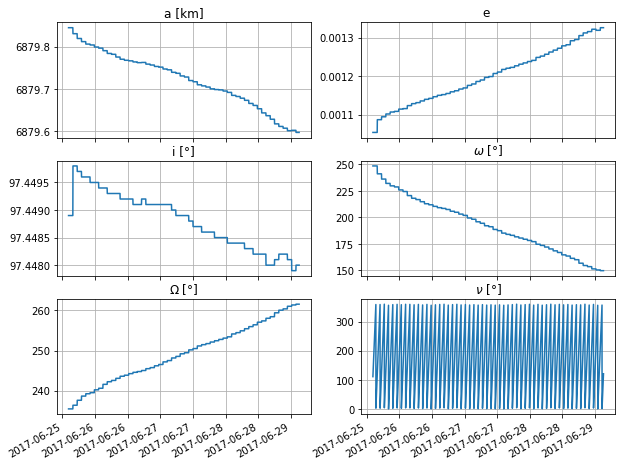

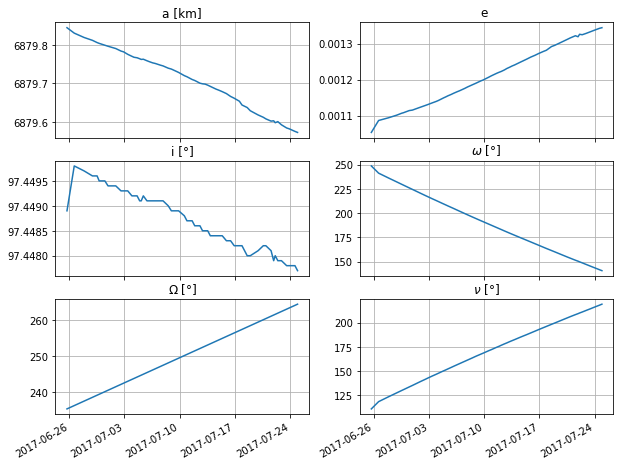

In [82]:
## PLOTTING CLASSICAL ORBITAL ELEMENTS
titles = ["a","e","i","$\omega$","$\Omega$","$\\nu$"]
ylabels = ["[km]", "", "[°]", "[°]", "[°]", "[°]"]
timeAxis = maneuvers.history.datetime
fig, axes = plt.subplots(3,2,figsize=(10,8),sharex=True)
n=5000
for i in range(0,6):
    if i in [2,3,4,5]:
        axes[int((i-i%2)/2),i%2].plot(timeAxis[0:n],maneuvers.history.coe[0:n,i]*180/np.pi)
    else:
        if i == 0:
            axes[int((i-i%2)/2),i%2].plot(timeAxis[0:n],maneuvers.history.coe[0:n,i]/1000)
        else:
            axes[int((i-i%2)/2),i%2].plot(timeAxis[0:n],maneuvers.history.coe[0:n,i])
    axes[int((i-i%2)/2),i%2].set_title(titles[i]+" "+ylabels[i])


    axes[int((i-i%2)/2),i%2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_scientific(False)
    axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_useOffset(False)
    axes[int((i-i%2)/2),i%2].grid(b=True)
fig.autofmt_xdate()

fig, axes = plt.subplots(3,2,figsize=(10,8),sharex=True)
for i in range(0,6):
    if i in [2,3,4,5]:
        axes[int((i-i%2)/2),i%2].plot(SUCHAIDates[0:60],SUCHAICoes[0:60,i]*180/np.pi)
    else:
        if i == 0:
            axes[int((i-i%2)/2),i%2].plot(SUCHAIDates[0:60],SUCHAICoes[0:60,i]/1000)
        else:
            axes[int((i-i%2)/2),i%2].plot(SUCHAIDates[0:60],SUCHAICoes[0:60,i])
    axes[int((i-i%2)/2),i%2].set_title(titles[i]+" "+ylabels[i])


    axes[int((i-i%2)/2),i%2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_scientific(False)
    axes[int((i-i%2)/2),i%2].yaxis.get_major_formatter().set_useOffset(False)
    axes[int((i-i%2)/2),i%2].grid(b=True)
fig.autofmt_xdate()

ipv.figure(width=800,height=500)
ipv.pylab.plot(maneuvers.history.r[0:n,0]/1e3,maneuvers.history.r[0:n,2]/1e3,maneuvers.history.r[0:n,1]/1e3)
ipv.pylab.xlabel("X")
ipv.pylab.ylabel("Z")
ipv.pylab.zlabel("Y")
ipv.pylab.style.box_off()

theta, phi = np.linspace(0, 2 * np.pi, 60), np.linspace(0, np.pi, 60)
THETA, PHI = np.meshgrid(theta, phi)
R = constants.Re/1e3
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
ipv.pylab.plot_surface(X, Z, Y, color="lightblue")
ipv.pylab.xyzlim(10e3)

ipv.show()